In [188]:
from math import sqrt, pi
import requests
import re

import pandas as pd
import matplotlib.pyplot as plt


Q = 0.00000005670367 # Постоянная Стефана-Больцмана
R_SUN = 696_000_000 # Радиус Солнца (м)
LUM_SUN = 4 * pi * R_SUN**2 * Q * 5780**4 # Светимость Солнца (Вт)
FONT_SIZE = 14 # Размер текста

In [189]:
def value_chart(list_value: list) -> list:
    """Функция просчёта кол-ва одинаковых значений."""
    list_name = []
    list_count = []
    set_value = list(set(list_value))
    for value in set_value:
        count = list_value.count(value)
        list_name.append(value)
        list_count.append(count)
    return list_name, list_count

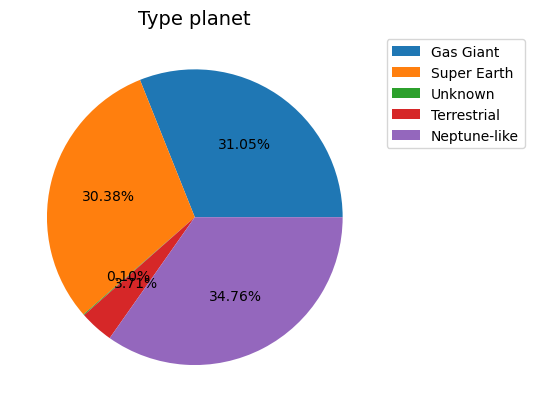

In [190]:
# Получаем DataFrame планет и выводим график по типу планеты
df_planet = pd.read_csv('cleaned_5250.csv')
planet_type, planet_count = value_chart(list(df_planet['planet_type']))

fig, ax = plt.subplots()
ax.pie(planet_count, autopct='%.2f%%')
ax.legend(loc='upper left', labels=planet_type, bbox_to_anchor=(1.0, 1.0))
ax.set_title('Type planet', fontsize=FONT_SIZE)
plt.show()

In [191]:
# Фильтруем по типу, похожему на земной и отсеиваем пустые значения
df_planet = df_planet[(df_planet['planet_type'] == 'Terrestrial') &
                      (df_planet['orbital_radius'].notna() == True)]
df_planet

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
141,EPIC 201757695.02,1884.0,14.974,Terrestrial,2020,0.688,Earth,0.908,Earth,0.02960,0.005476,0.00,Transit
251,GJ 367 b,31.0,10.153,Terrestrial,2021,0.546,Earth,0.718,Earth,0.00710,0.000821,0.00,Transit
923,HD 23472 d,127.0,9.730,Terrestrial,2022,0.550,Earth,0.750,Earth,0.04298,0.010951,0.07,Transit
924,HD 23472 e,127.0,9.730,Terrestrial,2022,0.720,Earth,0.818,Earth,0.06800,0.021629,0.07,Transit
1301,K2-116 b,161.0,10.800,Terrestrial,2017,0.257,Earth,0.690,Earth,0.04800,0.012868,0.06,Transit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,TOI-700 e,102.0,13.151,Terrestrial,2023,0.818,Earth,0.953,Earth,0.13400,0.076112,0.06,Transit
5012,TRAPPIST-1 d,41.0,17.020,Terrestrial,2016,0.388,Earth,0.788,Earth,0.02227,0.010951,0.01,Transit
5013,TRAPPIST-1 e,41.0,17.020,Terrestrial,2017,0.692,Earth,0.920,Earth,0.02925,0.016701,0.01,Transit
5016,TRAPPIST-1 h,41.0,17.020,Terrestrial,2017,0.326,Earth,0.755,Earth,0.06189,0.051472,0.01,Transit


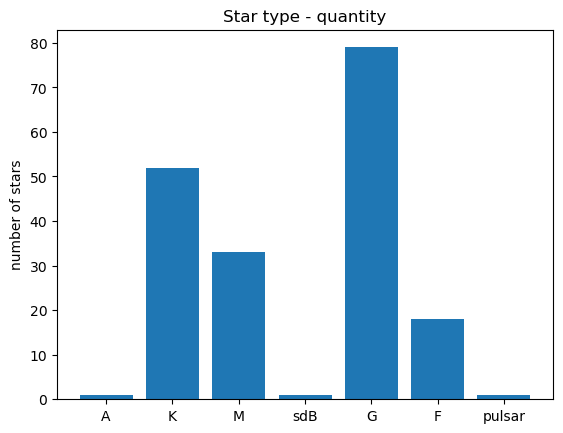

In [192]:
# Получаем DataFrame звёзд, имеющиx планеты на орбите
# и строим график по полученным данным
df_star = pd.read_html(
  'https://en.wikipedia.org/wiki/List_of_multiplanetary_systems',
  match='Notes'
)
df_star = df_star[0]

# Заменяем пустые ячейки на 'unknown'
df_star['Spectraltype'].fillna('unknown', inplace=True)
spectraltype = list(df_star['Spectraltype'].values)

# Выделяем звёзды под общие классы (M, G, K...)
sort_spectraltype = []
for value in spectraltype:
    value = re.search(r'unknown|pulsar|sdB|[^A-F]|F|A', value)
    if value.group() != 'unknown':
        sort_spectraltype.append(value.group())
star_type, star_count = value_chart(sort_spectraltype)

fig, ax = plt.subplots()

ax.bar(star_type, star_count)
ax.set_ylabel('number of stars')
ax.set_title('Star type - quantity')

plt.show()

In [193]:
# Фильтруем по классу, близкому к Солнцу
# отсеиваем записи с пустыми значениями
df_star = df_star[(df_star['Spectraltype'].str.contains('G')==True)
                 & (df_star['Temperature (K)'] != 'unknown')]
df_star

,Star,Constellation,Rightascension,Declination,Apparentmagnitude,Distance (ly),Spectraltype,Mass(M☉),Temperature (K),Age(Gyr),Confirmed(unconfirmed)planets,Notes
0,Sun,–,-,-,−26.74,0.000016,G2V,1,5778,4.572,8 (1),The hypothesised Planet Nine remains unconfirmed.
6,Tau Ceti,Cetus,01h 44m 05.13s,−15° 56′ 22.4″,3.49,11.905,G8V,0.783,5344,5.8,4 (4),"Were planets b, c, d, i, PxP-4 and PxP-5 confi..."
10,82 G. Eridani,Eridanus,03h 19m 55.65s,−43° 04′ 11.2″,4.254,19.71,G8V,0.7,5401,5.76,3 (3),This star also has a dust disk[23] with a semi...
14,61 Virginis,Virgo,13h 18m 24.31s,−18° 18′ 40.3″,4.74,28,G5V,0.954,5531,8.96,2 (1),"Planet d remains unconfirmed,[31] and a 2021 s..."
25,47 Ursae Majoris,Ursa Major,10h 59m 27.97s,+40° 25′ 48.9″,5.10,46,G0V,1.029,5892,7.434,3,Planet b was discovered in 1996 and was one of...
...,...,...,...,...,...,...,...,...,...,...,...,...
193,Kepler-53,Lyra,19h 21m 51.0s,+40° 33′ 45″,16,4455,G?V,0.98,5858,unknown,3,NaN
194,Kepler-30,Lyra,19h 01m 08.07s,+38° 56′ 50.21″,15.403,4560,G6V,0.99,5498,unknown,3,NaN
195,Kepler-84,Cygnus,19h 53m 00.49s,+40° 29′ 45.87″,14.764,4700,G3IV,1,5755,unknown,5,NaN
197,Kepler-238,Lyra,19h 11m 35s,+40° 38′ 16″,15.084,5867,G5IV,1.06,5614,unknown,5,One of the farthest systems from the Sun with ...


In [194]:
# Создаем новый DataFrame Планета-Звезда с необходимыми данными для вычислений
df_planet_star = pd.DataFrame(columns=['name', 'orbital_radius', 'star',
                                      'luminosity_star', 'spectraltype_star'])
for planet in df_planet['name']:
    orbital_radius = df_planet[df_planet['name'] == planet]['orbital_radius'].values[0]
    for star in df_star['Star']:
        # Берём название звезды, планеты и проверяем совпадение
        # Планетам(обычно) даётся название в честь звезды
        # А звёздам в честь аппарата-первооткрывателя
        if star in planet:
            spectraltype = df_star[df_star['Star'] == star]['Spectraltype'].values[0]
            response = requests.get(f'https://en.wikipedia.org/wiki/{star}')
            # Получаем с HTML кода радиус звезды(если такой имеется)
            response = re.search(r'Radius</a></b></td><td>(<span class="nowrap">'
                                 r'<span data-sort-value="[0-9]+\\xe2\\x99\\xa0">'
                                 r'</span>|)[0-9.)(]+',
                                 str(response.content))
            if response:
                radius_coef = float(re.search(r'[0-9.]+$', response.group()).group())
                # Приводим температуру к валидному виду (5999±99 -> 5999 | 5999(A ..) -> 5999)
                temperature = df_star[df_star['Star'] == star]['Temperature (K)'].values[0]
                temperature = temperature.split('±')[0]
                temperature = int(temperature.split('(')[0])     
                # Просчитываем светимость звезды
                luminosity = 4 * pi * (radius_coef * R_SUN)**2 * Q * temperature**4
                # Создание фрейм-буфера
                line = pd.DataFrame(
                                    data={'name': [planet], 'orbital_radius': [orbital_radius],
                                          'star': [star], 'luminosity_star':[luminosity],
                                          'spectraltype_star': [spectraltype]}
                        )
                df_planet_star = pd.concat([df_planet_star, line], ignore_index = True)
            
df_planet_star.sort_values(by=['star'])


,name,orbital_radius,star,luminosity_star,spectraltype_star
0,Kepler-1076 b,0.0611,Kepler-107,8.470264e+26,G2V[125]
1,Kepler-1130 b,0.0595,Kepler-11,3.747919e+26,G6V[126]
2,Kepler-1130 c,0.0423,Kepler-11,3.747919e+26,G6V[126]
3,Kepler-1130 d,0.0506,Kepler-11,3.747919e+26,G6V[126]
4,Kepler-1141 b,0.0345,Kepler-11,3.747919e+26,G6V[126]
5,Kepler-1152 b,0.0223,Kepler-11,3.747919e+26,G6V[126]
6,Kepler-1169 b,0.0709,Kepler-11,3.747919e+26,G6V[126]
7,Kepler-1173 b,0.0157,Kepler-11,3.747919e+26,G6V[126]
8,Kepler-119 c,0.0490,Kepler-11,3.747919e+26,G6V[126]
9,Kepler-11 b,0.0910,Kepler-11,3.747919e+26,G6V[126]


In [195]:
# Просчитываем среднее значение зоны возможного обитания
# живых организмов
df_planet_star['habitable_zone'] = [sqrt(int(luminosity_star) / LUM_SUN)
                                    for luminosity_star in df_planet_star['luminosity_star']]
status = []
# Проверяем возможное вхождение в зону обитания
for i in range(len(df_planet_star)):
    planet_star = df_planet_star.iloc[i]
    orbital_radius = float(planet_star[1])
    habitable_zone = float(planet_star[5])
    if habitable_zone*0.8 <= orbital_radius <= habitable_zone*2:
        status.append(True)
    else:
        status.append(False)

In [198]:
# Выводим список, возможно, обитаемых планет и их звёзд
# или очень грустное сообщение
if True in status:
    df_planet_star['status'] = status
    df_planet_star = df_planet_star[df_planet_star['status'] == True]
    end = df_planet_star[['name','star']]
else:
    end = pd.DataFrame(
                  data={'message': ['Пока тут пусто и грустно.'],}
                 )
end

,message
0,Пока тут пусто и грустно.
